In [16]:
import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
df = pd.read_csv("heart_disease_dataset (1).csv")
df.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,58,1,1,134,246,0,0,155,0,0.4,1,1,2,1
1,52,0,2,112,245,0,0,143,1,0.1,0,0,3,1
2,59,0,2,126,196,0,0,162,1,1.1,1,0,1,1
3,67,1,1,165,201,0,0,180,0,0.4,2,0,2,0
4,51,1,0,146,174,1,1,133,1,0.9,1,1,2,1


In [ ]:

# ML models and utilities
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve
)
from sklearn.inspection import permutation_importance

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


✅ Dataset loaded successfully!

--- First 10 rows ---


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,58,1,1,134,246,0,0,155,0,0.4,1,1,2,1
1,52,0,2,112,245,0,0,143,1,0.1,0,0,3,1
2,59,0,2,126,196,0,0,162,1,1.1,1,0,1,1
3,67,1,1,165,201,0,0,180,0,0.4,2,0,2,0
4,51,1,0,146,174,1,1,133,1,0.9,1,1,2,1
5,51,1,3,127,137,0,1,121,0,0.3,1,1,2,1
6,68,1,3,134,318,0,1,138,0,0.1,1,1,2,1
7,60,1,2,129,182,0,0,154,0,3.9,2,0,2,1
8,49,1,1,128,204,0,1,146,0,0.1,0,0,2,0
9,58,1,1,111,213,0,1,171,0,3.6,1,0,0,1



--- Descriptive Statistics ---


,count,mean,std,min,25%,50%,75%,max
age,400.0,53.66750,8.508403,29.0,48.0,54.0,59.0,77.0
sex,400.0,0.66250,0.473449,0.0,0.0,1.0,1.0,1.0
chest_pain_type,400.0,1.71250,1.035628,0.0,1.0,2.0,3.0,3.0
resting_blood_pressure,400.0,123.63000,16.567114,94.0,112.0,124.0,135.0,174.0
cholesterol,400.0,216.62750,41.379941,126.0,188.0,216.0,246.0,336.0
fasting_blood_sugar,400.0,0.14000,0.347422,0.0,0.0,0.0,0.0,1.0
resting_ecg,400.0,0.53000,0.533678,0.0,0.0,1.0,1.0,2.0
max_heart_rate,400.0,146.71750,21.104293,91.0,132.0,146.0,161.0,202.0
exercise_induced_angina,400.0,0.29250,0.455480,0.0,0.0,0.0,1.0,1.0
st_depression,400.0,0.75325,0.772841,0.0,0.2,0.6,0.9,4.9



--- Missing Values ---


,missing_count
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholesterol,0
fasting_blood_sugar,0
resting_ecg,0
max_heart_rate,0
exercise_induced_angina,0
st_depression,0



--- Target Distribution ---


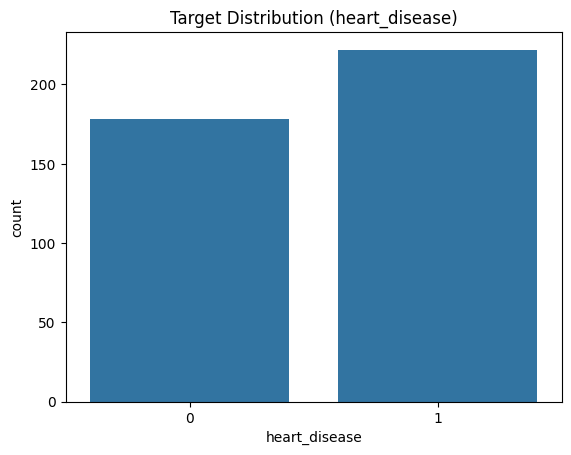


--- Feature Distributions ---


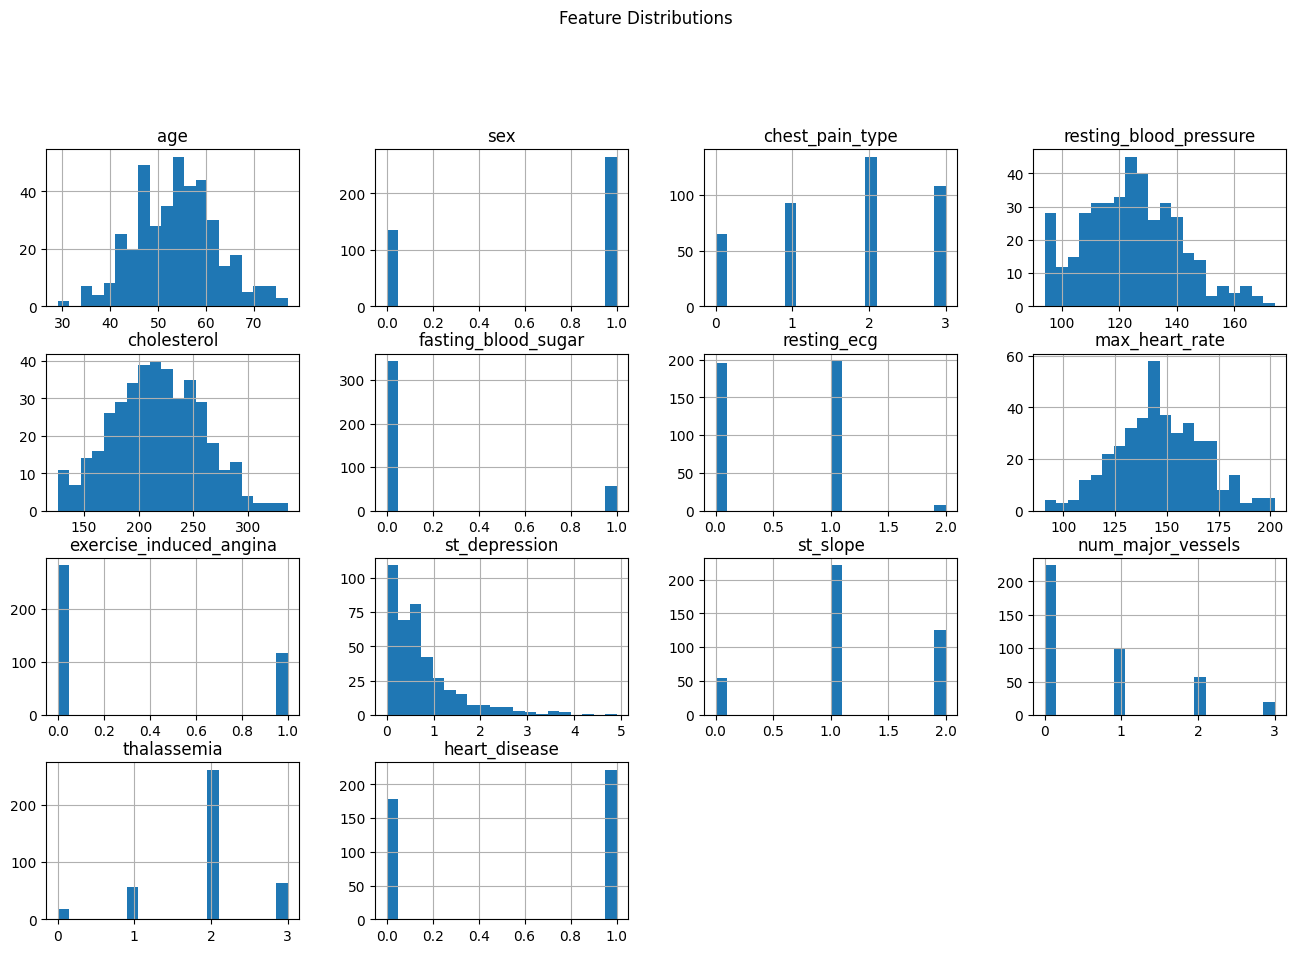


--- Correlation Heatmap ---


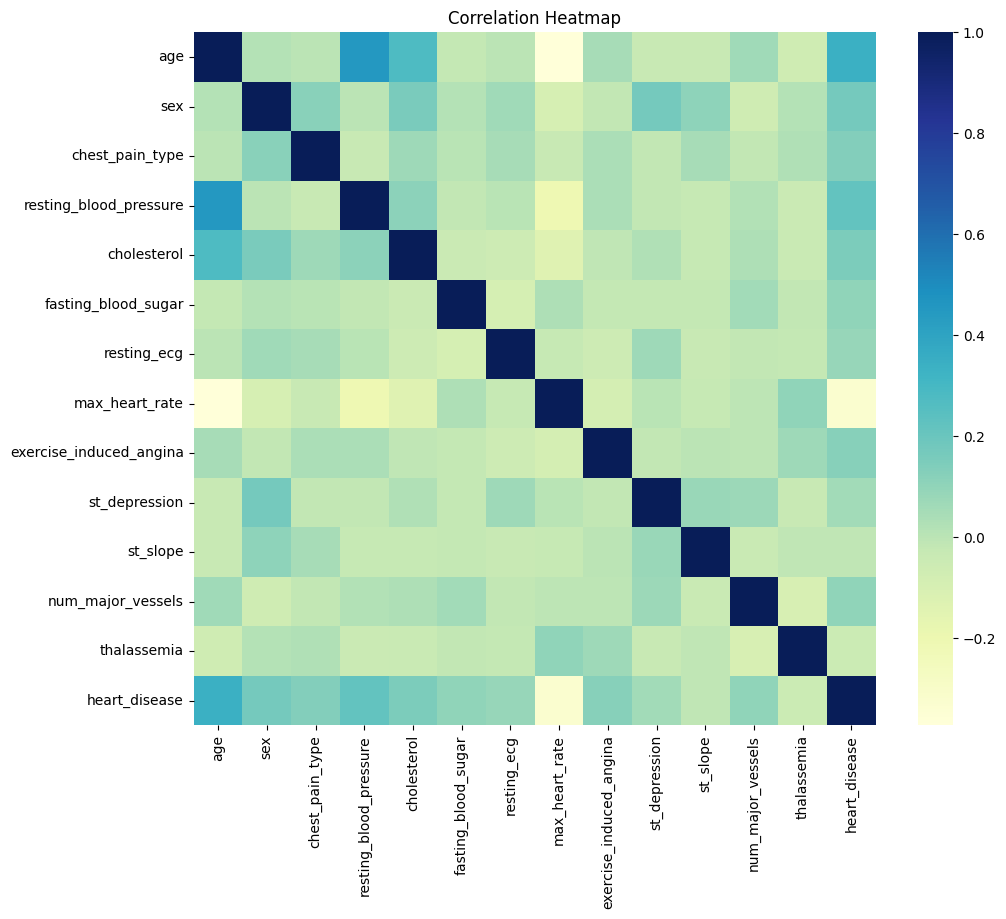


--- Pairwise Plot ---


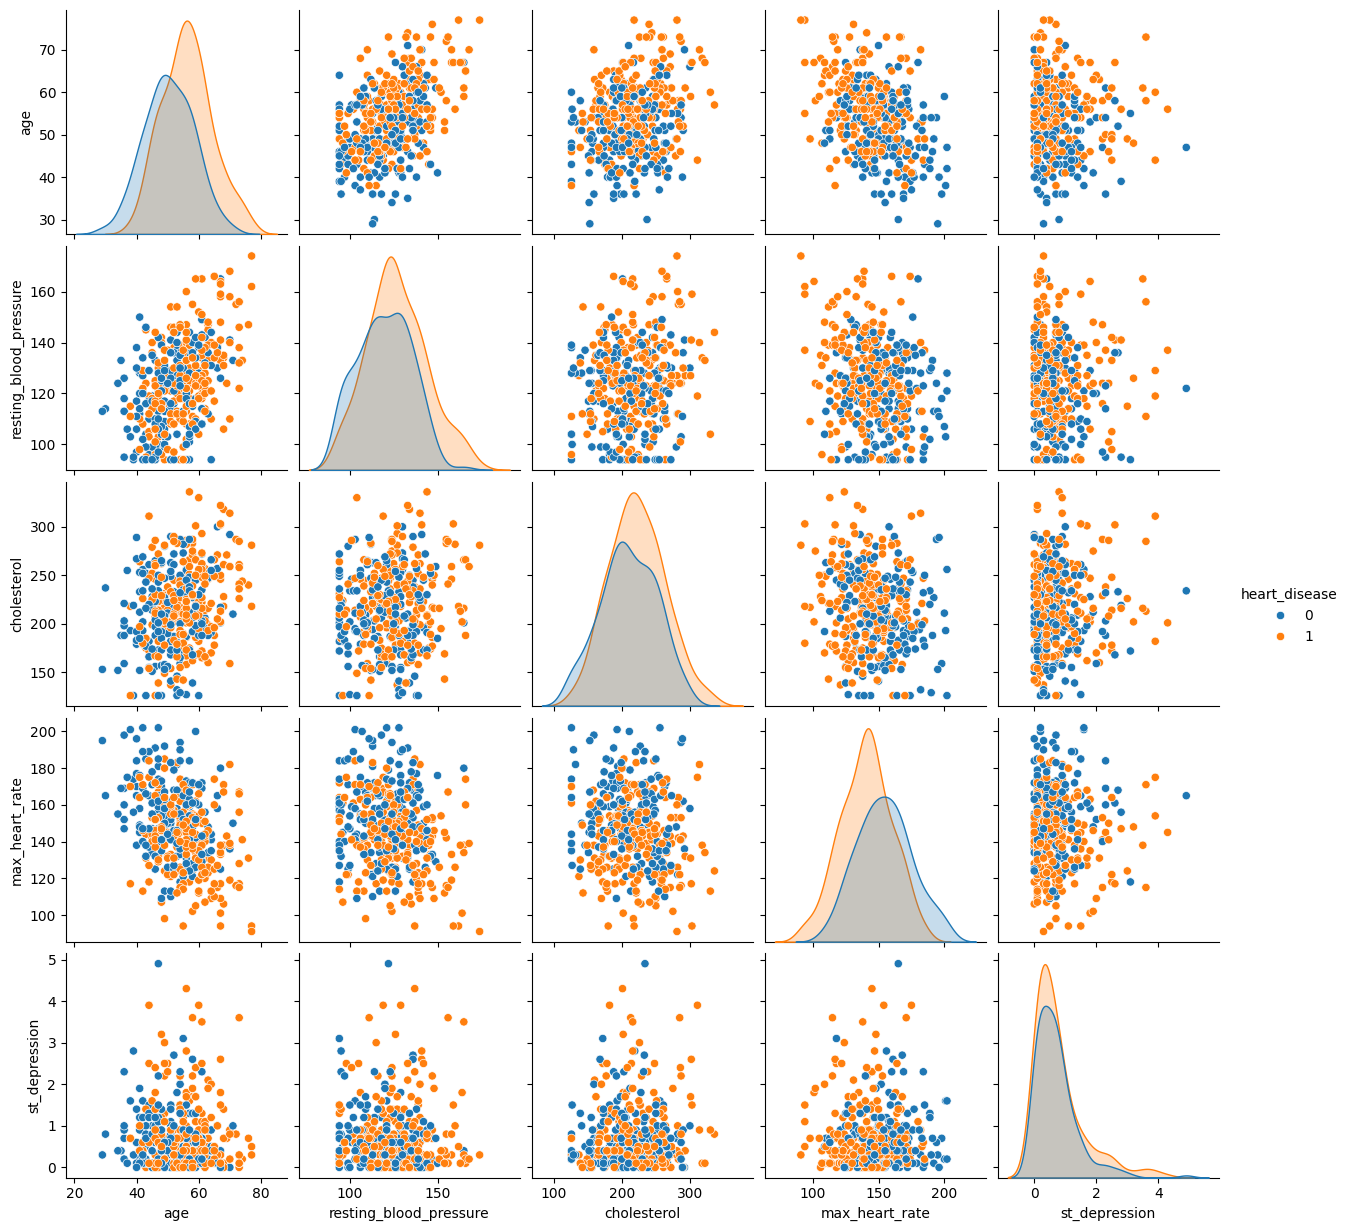


--- Outlier Detection (Boxplots) ---


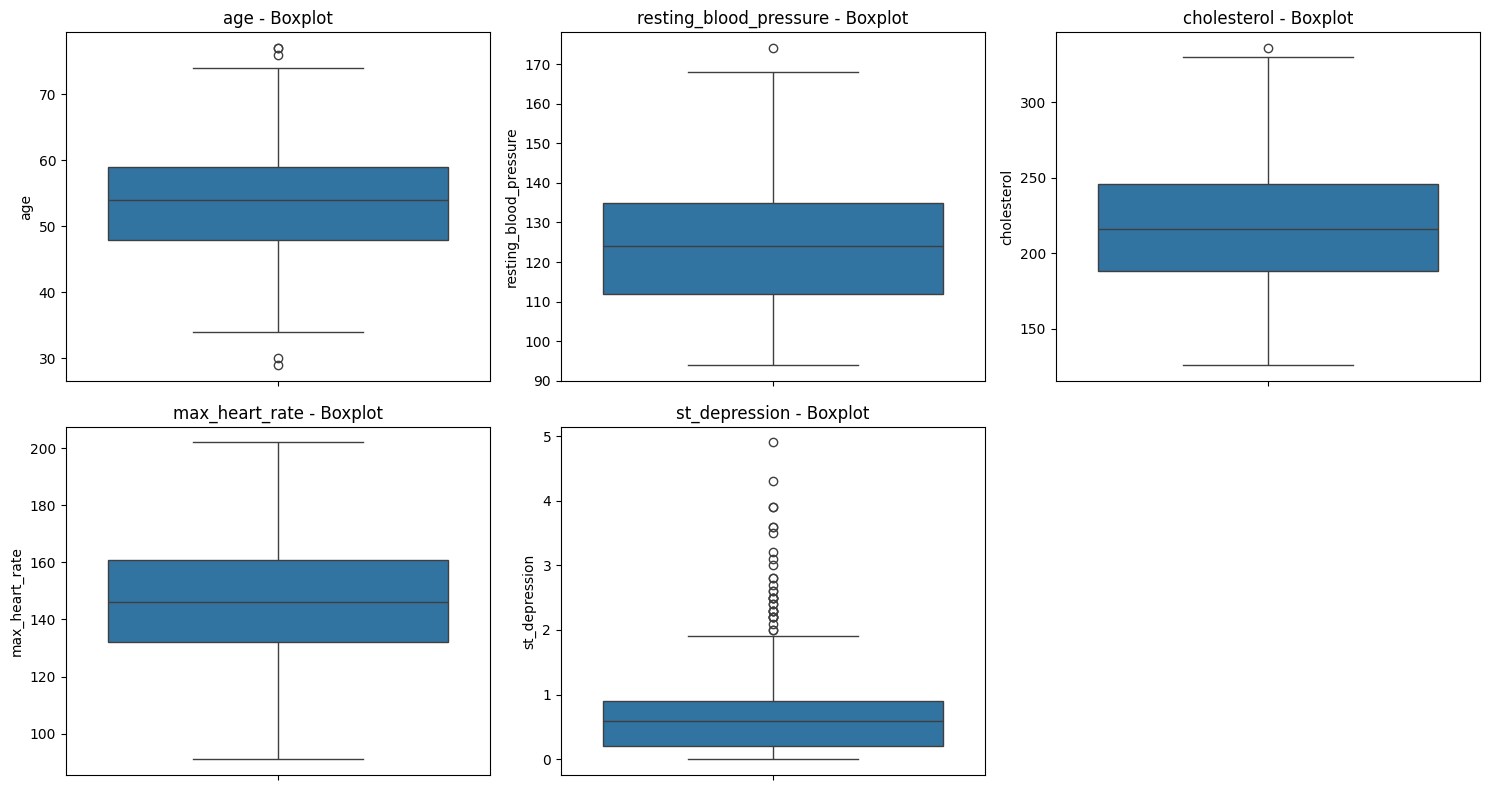


--- Categorical Features vs Target ---


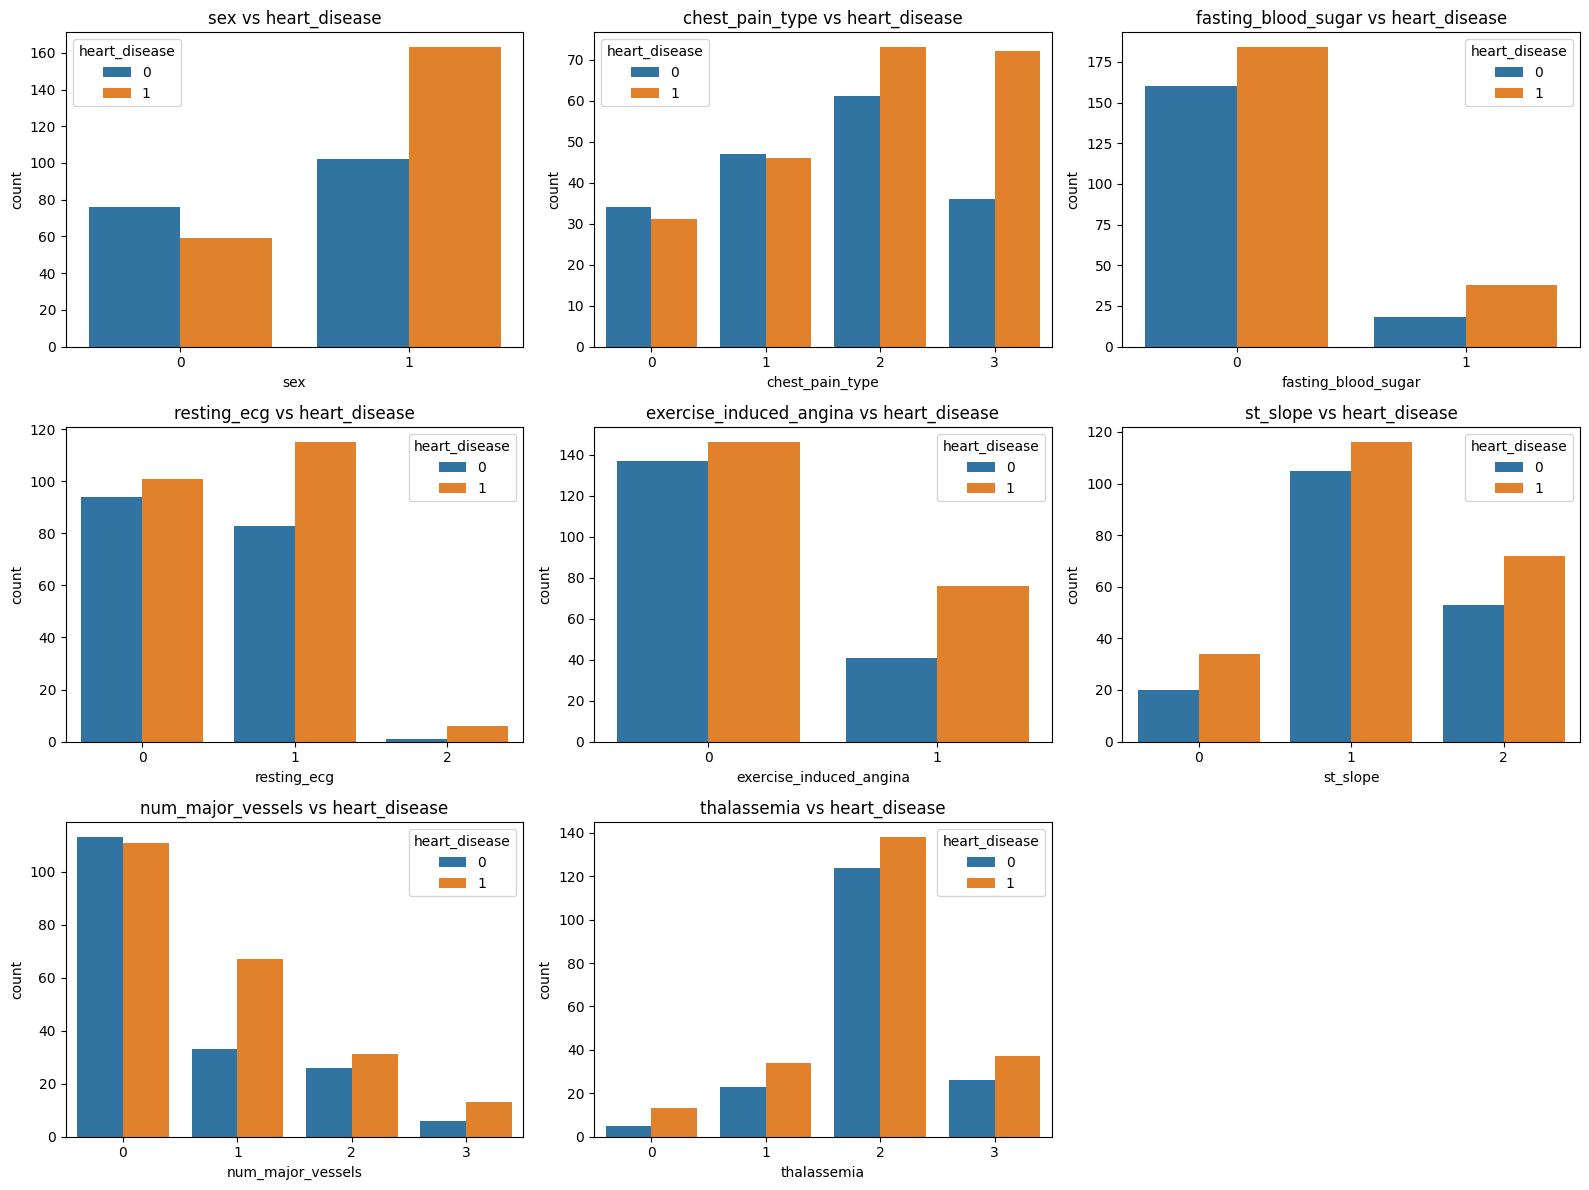


✅ Preprocessing complete!
Train size: 320 rows, Test size: 80 rows
Numerical features: 13, Categorical features: 0

--- Transformed Data Sample (first 5 rows) ---


,0,1,2,3,4,5,6,7,8,9
0,0.639954,0.703795,0.279504,0.037725,-0.145252,-0.414923,0.881265,0.128890,-0.659528,2.173446
1,0.523068,0.703795,0.279504,1.023192,0.318335,-0.414923,-0.986316,0.035258,-0.659528,-0.998744
2,-0.178252,0.703795,1.241237,1.269559,-0.145252,-0.414923,-0.986316,-0.058374,-0.659528,-0.073522
3,1.107501,-1.420869,-0.682229,0.961601,0.928319,-0.414923,-0.986316,-1.135139,1.516235,-0.337871
4,-0.879572,0.703795,0.279504,-1.378884,1.757897,2.410085,-0.986316,-0.292453,-0.659528,2.173446


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import joblib

# === CONFIG ===
DATA_PATH = "heart_disease_dataset (1).csv"
TARGET = "heart_disease"

# === 1) LOAD DATA ===
df = pd.read_csv(DATA_PATH)
print("✅ Dataset loaded successfully!")
print("\n--- First 10 rows ---")
display(df.head(10))

# === 2) SUMMARY ===
print("\n--- Descriptive Statistics ---")
display(df.describe().T)

print("\n--- Missing Values ---")
display(df.isnull().sum().to_frame("missing_count"))

# === 3) Target Distribution ===
print("\n--- Target Distribution ---")
ax = sns.countplot(x=TARGET, data=df)
ax.set_title("Target Distribution (heart_disease)")
plt.show()

# === 4) Histograms (Feature Distributions) ===
print("\n--- Feature Distributions ---")
df.hist(figsize=(16,10), bins=20)
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

# === 5) Correlation Heatmap ===
print("\n--- Correlation Heatmap ---")
corr = df.corr(numeric_only=True)
plt.figure(figsize=(11,9))
sns.heatmap(corr, cmap="YlGnBu", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# === 6) Pairwise Plots ===
pair_vars = [c for c in ['age','resting_blood_pressure','cholesterol','max_heart_rate','st_depression'] if c in df.columns]
if len(pair_vars) >= 2 and TARGET in df.columns:
    print("\n--- Pairwise Plot ---")
    sns.pairplot(df, vars=pair_vars, hue=TARGET, diag_kind="kde")
    plt.show()

# === 7) Outliers (Boxplots) ===
box_vars = pair_vars
if box_vars:
    print("\n--- Outlier Detection (Boxplots) ---")
    rows = int(np.ceil(len(box_vars)/3))
    plt.figure(figsize=(15, 4*rows))
    for i, feature in enumerate(box_vars, 1):
        plt.subplot(rows, 3, i)
        sns.boxplot(y=df[feature])
        plt.title(f"{feature} - Boxplot")
    plt.tight_layout()
    plt.show()

# === 8) Categorical vs Target ===
cat_features = [c for c in ['sex','chest_pain_type','fasting_blood_sugar','resting_ecg',
                            'exercise_induced_angina','st_slope','num_major_vessels','thalassemia']
                if c in df.columns and c != TARGET]
if cat_features:
    print("\n--- Categorical Features vs Target ---")
    cols = 3
    rows = int(np.ceil(len(cat_features)/cols))
    plt.figure(figsize=(16, 4*rows))
    for i, c in enumerate(cat_features, 1):
        plt.subplot(rows, cols, i)
        sns.countplot(x=c, hue=TARGET, data=df)
        plt.title(f"{c} vs {TARGET}")
    plt.tight_layout()
    plt.show()

# === 9) Preprocessing (ColumnTransformer) ===
num_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
if TARGET in num_features: num_features.remove(TARGET)
cat_features = [c for c in df.columns if c not in num_features + [TARGET]]

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, num_features),
    ("cat", categorical_pipeline, cat_features)
])

X = df.drop(columns=[TARGET])
y = df[TARGET].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train_t = preprocessor.fit_transform(X_train)
X_test_t  = preprocessor.transform(X_test)

print("\n✅ Preprocessing complete!")
print(f"Train size: {X_train_t.shape[0]} rows, Test size: {X_test_t.shape[0]} rows")
print(f"Numerical features: {len(num_features)}, Categorical features: {len(cat_features)}")

# Display sample of transformed data
print("\n--- Transformed Data Sample (first 5 rows) ---")
display(pd.DataFrame(X_train_t[:5, :10]))  # Show only first 10 features for clarity



🔹 Evaluating DecisionTree with 5-Fold CV...


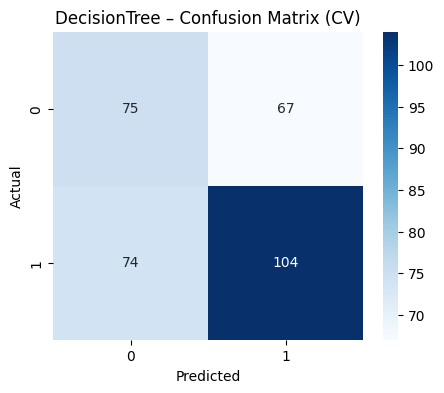

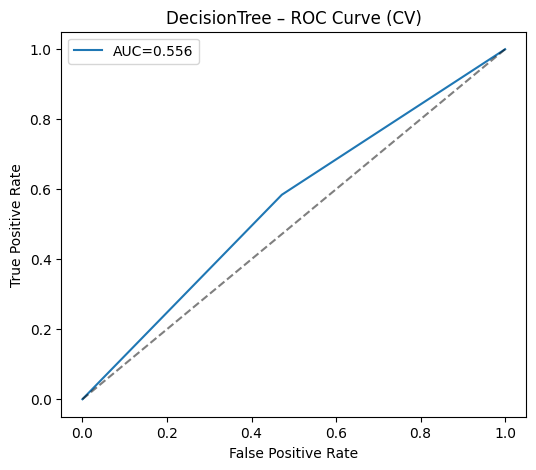


Classification Report (Cross-Validation):


,precision,recall,f1-score,support
0,0.503356,0.528169,0.515464,142.000000
1,0.608187,0.584270,0.595989,178.000000
accuracy,0.559375,0.559375,0.559375,0.559375
macro avg,0.555771,0.556219,0.555726,320.000000
weighted avg,0.561668,0.559375,0.560256,320.000000


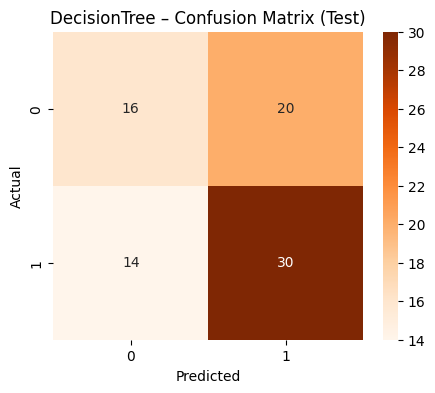

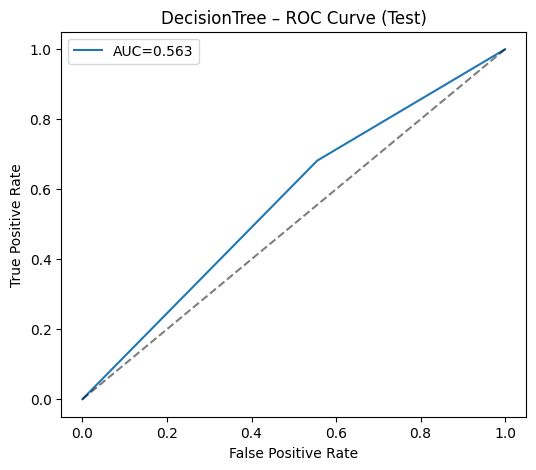


Classification Report (Test):


,precision,recall,f1-score,support
0,0.533333,0.444444,0.484848,36.000
1,0.600000,0.681818,0.638298,44.000
accuracy,0.575000,0.575000,0.575000,0.575
macro avg,0.566667,0.563131,0.561573,80.000
weighted avg,0.570000,0.575000,0.569246,80.000



🔹 Evaluating RandomForest with 5-Fold CV...


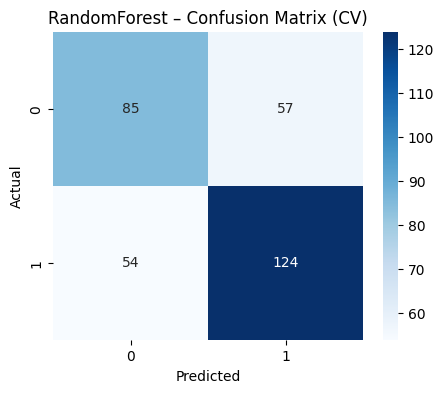

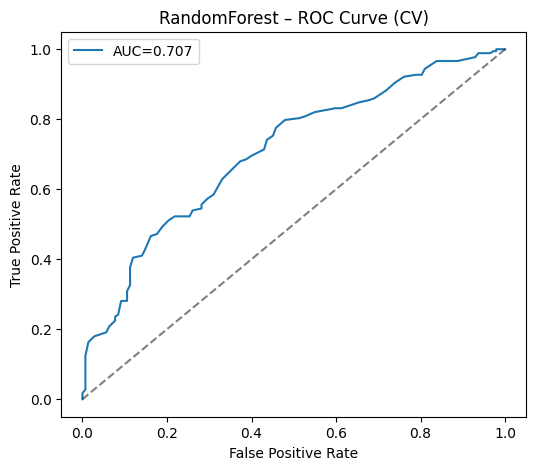


Classification Report (Cross-Validation):


,precision,recall,f1-score,support
0,0.611511,0.598592,0.604982,142.000000
1,0.685083,0.696629,0.690808,178.000000
accuracy,0.653125,0.653125,0.653125,0.653125
macro avg,0.648297,0.647610,0.647895,320.000000
weighted avg,0.652435,0.653125,0.652723,320.000000


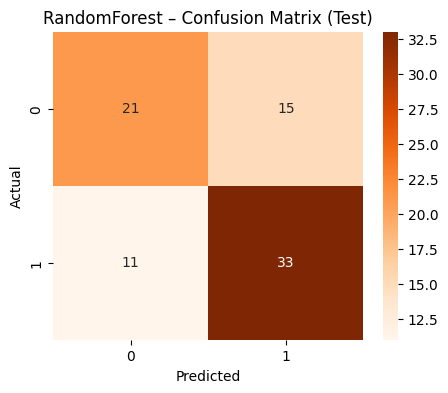

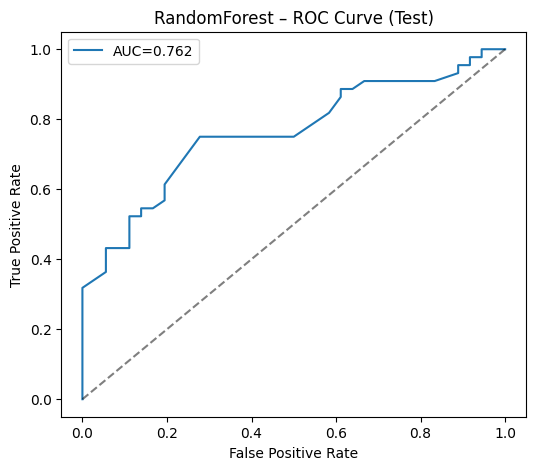


Classification Report (Test):


,precision,recall,f1-score,support
0,0.656250,0.583333,0.617647,36.000
1,0.687500,0.750000,0.717391,44.000
accuracy,0.675000,0.675000,0.675000,0.675
macro avg,0.671875,0.666667,0.667519,80.000
weighted avg,0.673438,0.675000,0.672506,80.000



🔹 Evaluating LogisticRegression with 5-Fold CV...


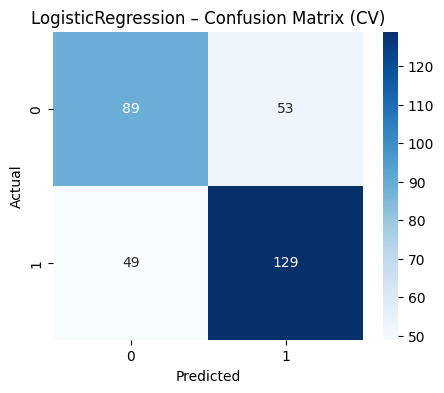

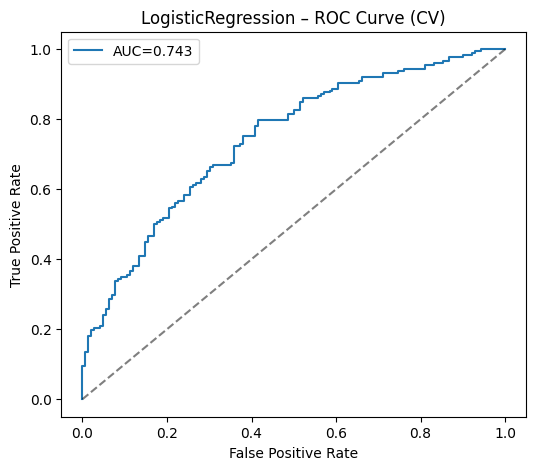


Classification Report (Cross-Validation):


,precision,recall,f1-score,support
0,0.644928,0.626761,0.635714,142.00000
1,0.708791,0.724719,0.716667,178.00000
accuracy,0.681250,0.681250,0.681250,0.68125
macro avg,0.676859,0.675740,0.676190,320.00000
weighted avg,0.680452,0.681250,0.680744,320.00000


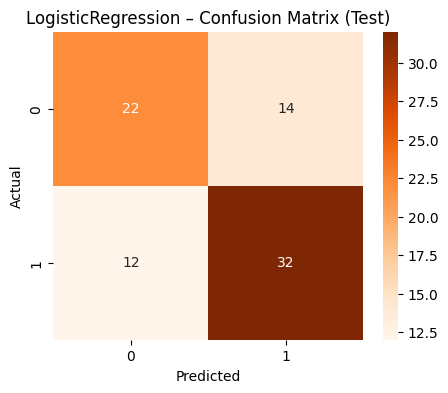

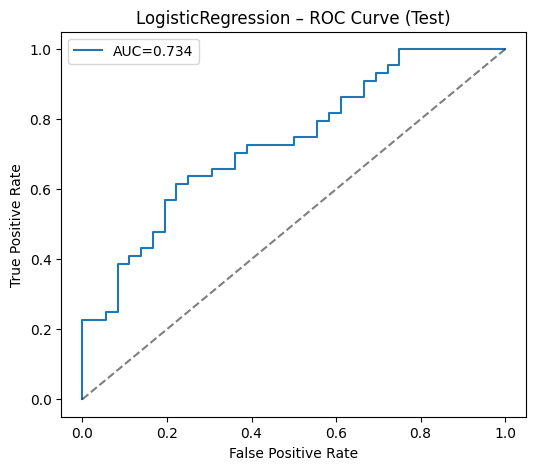


Classification Report (Test):


,precision,recall,f1-score,support
0,0.647059,0.611111,0.628571,36.000
1,0.695652,0.727273,0.711111,44.000
accuracy,0.675000,0.675000,0.675000,0.675
macro avg,0.671355,0.669192,0.669841,80.000
weighted avg,0.673785,0.675000,0.673968,80.000



🔹 Evaluating SVM with 5-Fold CV...


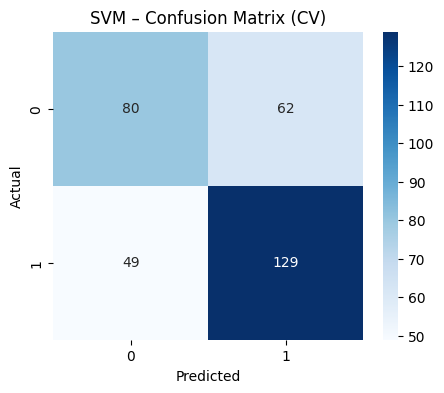

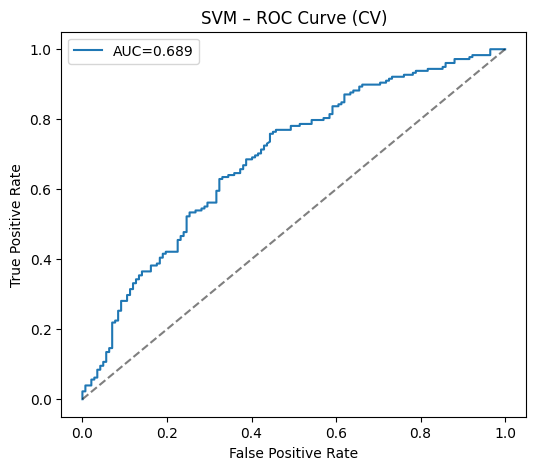


Classification Report (Cross-Validation):


,precision,recall,f1-score,support
0,0.620155,0.563380,0.590406,142.000000
1,0.675393,0.724719,0.699187,178.000000
accuracy,0.653125,0.653125,0.653125,0.653125
macro avg,0.647774,0.644050,0.644796,320.000000
weighted avg,0.650881,0.653125,0.650915,320.000000


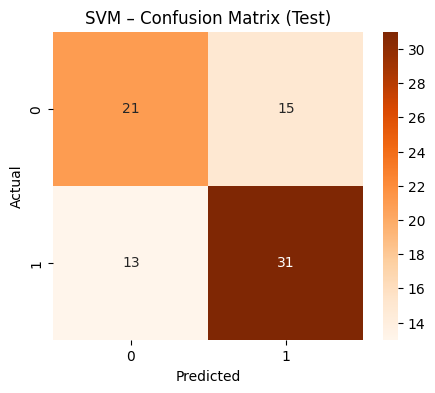

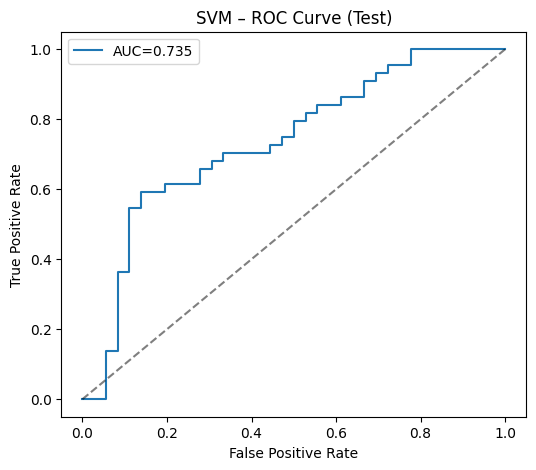


Classification Report (Test):


,precision,recall,f1-score,support
0,0.617647,0.583333,0.600000,36.00
1,0.673913,0.704545,0.688889,44.00
accuracy,0.650000,0.650000,0.650000,0.65
macro avg,0.645780,0.643939,0.644444,80.00
weighted avg,0.648593,0.650000,0.648889,80.00



✅ Model Performance Summary:


,Phase,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,DecisionTree_cv,0.559375,0.608187,0.584270,0.595989,0.556219
1,DecisionTree_test,0.575000,0.600000,0.681818,0.638298,0.563131
2,RandomForest_cv,0.653125,0.685083,0.696629,0.690808,0.706916
3,RandomForest_test,0.675000,0.687500,0.750000,0.717391,0.761679
4,LogisticRegression_cv,0.681250,0.708791,0.724719,0.716667,0.742602
5,LogisticRegression_test,0.675000,0.695652,0.727273,0.711111,0.734217
6,SVM_cv,0.653125,0.675393,0.724719,0.699187,0.689369
7,SVM_test,0.650000,0.673913,0.704545,0.688889,0.735480



✅ Phase 2 complete — all plots and metrics displayed inline.


In [ ]:

from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, auc, confusion_matrix,
                             classification_report)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# === CONFIG ===
OUT_DIR = "outputs"
MODEL_DIR = "models"
os.makedirs(OUT_DIR, exist_ok=True)
os.makedirs(MODEL_DIR, exist_ok=True)

# === LOAD SPLITS ===
splits = np.load(f"{OUT_DIR}/splits.npz")
X_train, X_test, y_train, y_test = splits["X_train"], splits["X_test"], splits["y_train"], splits["y_test"]

# === MODELS ===
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=2000, solver="liblinear", random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# === CROSS-VALIDATION EVALUATION ===
def cv_eval(name, est, X, y, cv=5):
    print(f"\n🔹 Evaluating {name} with {cv}-Fold CV...")
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    y_pred = cross_val_predict(est, X, y, cv=skf, method="predict")

    try:
        y_proba = cross_val_predict(est, X, y, cv=skf, method="predict_proba")[:,1]
    except Exception:
        try:
            y_proba = cross_val_predict(est, X, y, cv=skf, method="decision_function")
        except Exception:
            y_proba = None

    # Metrics
    m = {
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred, zero_division=0),
        "Recall": recall_score(y, y_pred, zero_division=0),
        "F1-Score": f1_score(y, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y, y_proba) if y_proba is not None else None
    }

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} – Confusion Matrix (CV)")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y, y_proba)
        plt.figure(figsize=(6,5))
        plt.plot(fpr, tpr, label=f"AUC={auc(fpr,tpr):.3f}")
        plt.plot([0,1],[0,1],'k--',alpha=.5)
        plt.title(f"{name} – ROC Curve (CV)")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()

    # Classification Report
    print("\nClassification Report (Cross-Validation):")
    display(pd.DataFrame(classification_report(y, y_pred, output_dict=True)).T)

    return m

# === MAIN LOOP ===
summary = {}
for name, est in models.items():
    # Cross-Validation
    summary[f"{name}_cv"] = cv_eval(name, est, X_train, y_train, cv=5)

    # Train on full training set
    est.fit(X_train, y_train)
    joblib.dump(est, f"{MODEL_DIR}/{name}_baseline.joblib")

    # Test set predictions
    yhat = est.predict(X_test)
    try:
        yprob = est.predict_proba(X_test)[:,1]
    except Exception:
        try:
            yprob = est.decision_function(X_test)
        except:
            yprob = None

    test_metrics = {
        "Accuracy": accuracy_score(y_test, yhat),
        "Precision": precision_score(y_test, yhat, zero_division=0),
        "Recall": recall_score(y_test, yhat, zero_division=0),
        "F1-Score": f1_score(y_test, yhat, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, yprob) if yprob is not None else None
    }
    summary[f"{name}_test"] = test_metrics

    # Confusion Matrix (Test)
    cm = confusion_matrix(y_test, yhat)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
    plt.title(f"{name} – Confusion Matrix (Test)")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

    # ROC Curve (Test)
    if yprob is not None:
        fpr, tpr, _ = roc_curve(y_test, yprob)
        plt.figure(figsize=(6,5))
        plt.plot(fpr, tpr, label=f"AUC={auc(fpr,tpr):.3f}")
        plt.plot([0,1],[0,1],'k--',alpha=.5)
        plt.title(f"{name} – ROC Curve (Test)")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()

    # Display Test Report
    print("\nClassification Report (Test):")
    display(pd.DataFrame(classification_report(y_test, yhat, output_dict=True)).T)

# === SUMMARY TABLE ===
summary_df = pd.DataFrame([{**{"Phase": k}, **v} for k,v in summary.items()])
print("\n✅ Model Performance Summary:")
display(summary_df)

print("\n✅ Phase 2 complete — all plots and metrics displayed inline.")



🔍 GridSearch: DECISIONTREE (scoring=roc_auc, cv=5)
Fitting 5 folds for each of 90 candidates, totalling 450 fits
✅ Best Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
🎯 Best CV Score: 0.6225
⏱ Time Taken: 2.9s


🔍 GridSearch: RANDOMFOREST (scoring=roc_auc, cv=5)
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
✅ Best Params: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
🎯 Best CV Score: 0.7309
⏱ Time Taken: 198.8s


🔍 GridSearch: LOGISTICREGRESSION (scoring=roc_auc, cv=5)
Fitting 5 folds for each of 40 candidates, totalling 200 fits
✅ Best Params: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
🎯 Best CV Score: 0.7564
⏱ Time Taken: 0.8s


🔍 GridSearch: SVM (scoring=roc_auc, cv=5)
Fitting 5 folds for each of 72 candidates, totalling 360 fits
✅ Best Params: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
🎯 Best CV Score: 0.7560
⏱ Time Taken: 25.9s

📘 E

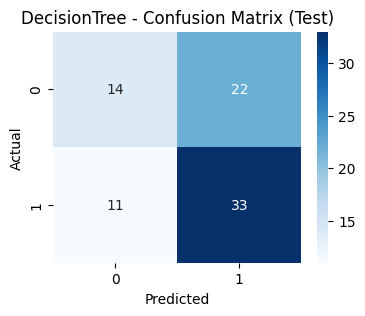

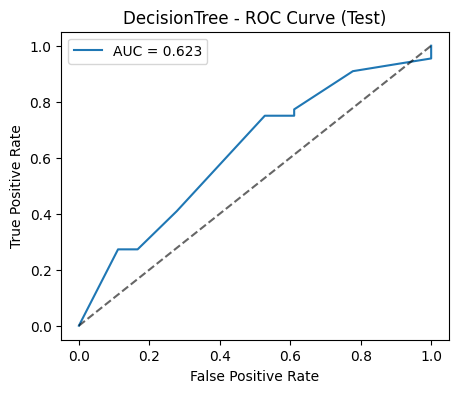


📘 Evaluating RandomForest on Test Set...


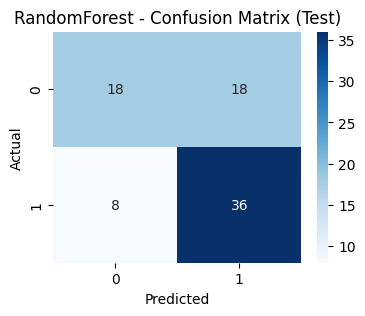

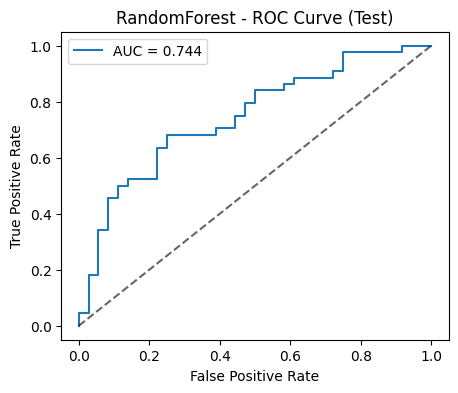


📘 Evaluating LogisticRegression on Test Set...


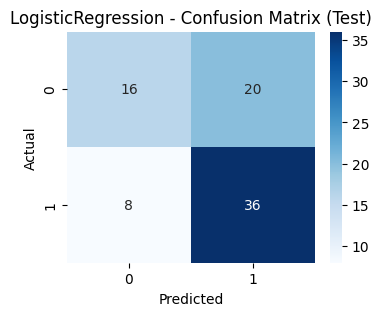

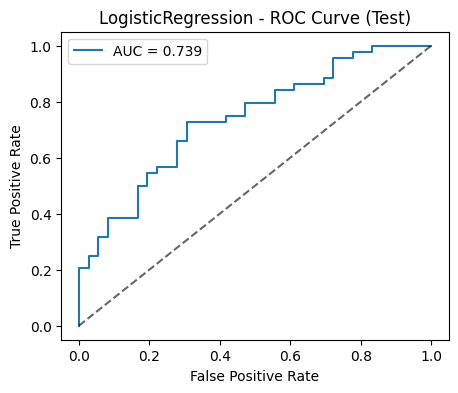


📘 Evaluating SVM on Test Set...


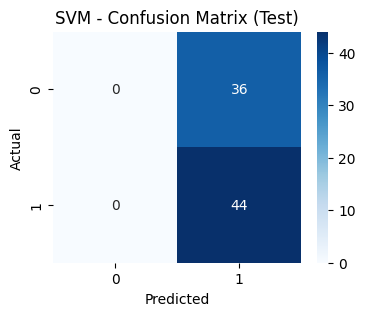

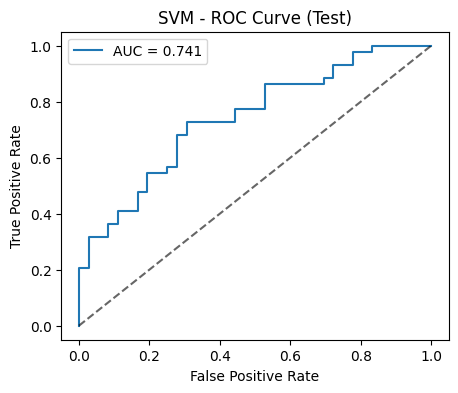


📊 Final Tuned Model Summary:



,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Best Params,CV Best Score
0,DecisionTree,0.587500,0.600000,0.750000,0.666667,0.622790,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}",0.622500
1,RandomForest,0.675000,0.666667,0.818182,0.734694,0.744318,"{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}",0.730900
2,LogisticRegression,0.650000,0.642857,0.818182,0.720000,0.738636,"{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}",0.756400
3,SVM,0.550000,0.550000,1.000000,0.709677,0.741162,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.756000



✅ Phase 3 complete. All tuned model results displayed above.


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from IPython.display import display, HTML

# === Setup Directories ===
OUT_DIR   = "outputs"
MODEL_DIR = "models"
os.makedirs(OUT_DIR, exist_ok=True)
os.makedirs(MODEL_DIR, exist_ok=True)

# === Load Pre-saved Train/Test Splits ===
splits = np.load(f"{OUT_DIR}/splits.npz")
X_train, X_test, y_train, y_test = splits["X_train"], splits["X_test"], splits["y_train"], splits["y_test"]

# === Parameter Grids ===
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000]
}
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# === Grid Search Function ===
def tune(name, est, grid, X, y, scoring='roc_auc', cv=5):
    print(f"\n🔍 GridSearch: {name.upper()} (scoring={scoring}, cv={cv})")
    t0 = time.time()
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    gs = GridSearchCV(estimator=est, param_grid=grid, scoring=scoring,
                      cv=skf, n_jobs=-1, verbose=1)
    gs.fit(X, y)
    secs = time.time() - t0

    print(f"✅ Best Params: {gs.best_params_}")
    print(f"🎯 Best CV Score: {gs.best_score_:.4f}")
    print(f"⏱ Time Taken: {secs:.1f}s\n")

    joblib.dump(gs, f"{MODEL_DIR}/grid_{name}.joblib")
    return gs, secs

# === Run Tuning for All Models ===
gs_dt, _   = tune("DecisionTree", DecisionTreeClassifier(random_state=42), dt_param_grid, X_train, y_train)
gs_rf, _   = tune("RandomForest", RandomForestClassifier(random_state=42), rf_param_grid, X_train, y_train)
gs_lr, _   = tune("LogisticRegression", LogisticRegression(random_state=42), lr_param_grid, X_train, y_train)
gs_svm, _  = tune("SVM", SVC(probability=True, random_state=42), svm_param_grid, X_train, y_train)

grids = {
    "DecisionTree": gs_dt,
    "RandomForest": gs_rf,
    "LogisticRegression": gs_lr,
    "SVM": gs_svm
}

# === Evaluate Tuned Models on Test Set ===
def eval_test(name, model, X, y):
    yhat = model.predict(X)
    try:
        yprob = model.predict_proba(X)[:, 1]
    except Exception:
        try:
            yprob = model.decision_function(X)
        except:
            yprob = None

    metrics = {
        "Accuracy": float(accuracy_score(y, yhat)),
        "Precision": float(precision_score(y, yhat, zero_division=0)),
        "Recall": float(recall_score(y, yhat, zero_division=0)),
        "F1-Score": float(f1_score(y, yhat, zero_division=0)),
        "ROC-AUC": float(roc_auc_score(y, yprob)) if yprob is not None else None
    }

    # --- Confusion Matrix ---
    cm = confusion_matrix(y, yhat)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix (Test)")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

    # --- ROC Curve ---
    if yprob is not None:
        fpr, tpr, _ = roc_curve(y, yprob)
        plt.figure(figsize=(5, 4))
        plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.3f}")
        plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
        plt.title(f"{name} - ROC Curve (Test)")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()

    return metrics

# === Collect and Display Results ===
rows = []
for k, gs in grids.items():
    best = gs.best_estimator_
    print(f"📘 Evaluating {k} on Test Set...")
    metrics = eval_test(k, best, X_test, y_test)
    rows.append({
        "Model": k,
        **metrics,
        "Best Params": gs.best_params_,
        "CV Best Score": round(gs.best_score_, 4)
    })
    print()

# === Create & Display Summary ===
tuned_summary = pd.DataFrame(rows)
print("📊 Final Tuned Model Summary:\n")
display(tuned_summary.style.set_caption("Tuned Model Performance Summary").set_table_styles([
    {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "120%"), ("font-weight", "bold")]}
]))

# === Save CSV (for record) ===
tuned_summary.to_csv(f"{OUT_DIR}/tuned_summary.csv", index=False)

print("\n✅ Phase 3 complete. All tuned model results displayed above.")


In [1]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel, Field, validator

app = FastAPI(title="Heart Disease Prediction API", version="1.0.0")

MODEL_PATH = os.getenv("MODEL_PATH", "models/final_pipeline.joblib")
THR_PATH   = os.getenv("THRESHOLD_PATH", "models/threshold.json")  # optional

model = None
threshold = 0.5
try:
    model = joblib.load(MODEL_PATH)
    if os.path.exists(THR_PATH):
        with open(THR_PATH) as f:
            threshold = float(json.load(f).get("chosen_threshold", 0.5))
except Exception as e:
    print("Model not loaded:", e)

class PatientFeatures(BaseModel):
    age: float = Field(..., ge=0, le=120)
    sex: int = Field(..., ge=0, le=1)
    chest_pain_type: int = Field(..., ge=0, le=3)
    resting_blood_pressure: float = Field(..., ge=40, le=300)
    cholesterol: float = Field(..., ge=50, le=700)
    fasting_blood_sugar: int = Field(..., ge=0, le=1)
    resting_ecg: int = Field(..., ge=0, le=2)
    max_heart_rate: float = Field(..., ge=40, le=250)
    exercise_induced_angina: int = Field(..., ge=0, le=1)
    st_depression: float = Field(..., ge=0.0, le=10.0)
    st_slope: int = Field(..., ge=0, le=2)
    num_major_vessels: int = Field(..., ge=0, le=3)
    thalassemia: int = Field(..., ge=0, le=3)

@app.get("/health")
def health():
    return {"status":"ok", "model_loaded": model is not None, "threshold": threshold}

@app.get("/model_info")
def model_info():
    meta_path = "models/model_metadata.json"
    if os.path.exists(meta_path):
        with open(meta_path) as f: return json.load(f)
    return {"detail": "metadata not found"}

@app.post("/predict")
def predict(payload: PatientFeatures):
    if model is None:
        raise HTTPException(status_code=503, detail="Model not available")
    # single-row in feature order expected by preprocessor
    x = [[
        payload.age, payload.sex, payload.chest_pain_type, payload.resting_blood_pressure,
        payload.cholesterol, payload.fasting_blood_sugar, payload.resting_ecg,
        payload.max_heart_rate, payload.exercise_induced_angina, payload.st_depression,
        payload.st_slope, payload.num_major_vessels, payload.thalassemia
    ]]
    try:
        proba = model.predict_proba(x)[0][1]
    except Exception:
        # if pipeline ends in SVM w/ decision function
        proba = float(model.decision_function(x))
    pred = int(proba >= threshold)
    return {"prediction": pred, "probability": float(proba), "threshold_used": threshold}


Model not loaded: [Errno 2] No such file or directory: 'models/final_pipeline.joblib'


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
import os

# Load dataset
df = pd.read_csv("heart_disease_dataset (1).csv")

# ✅ Use the correct target column name
target_col = 'heart_disease'

# Separate features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")

# Save model and scaler
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/heart_disease_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")

print("✅ Model and Scaler Saved Successfully!")



✅ Model Accuracy: 0.70
✅ Model and Scaler Saved Successfully!


In [2]:
# run in a notebook cell
!pip install pennylane pennylane-qiskit torch scikit-learn matplotlib seaborn statsmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Load dataset
DATA_PATH = "/content/heart_disease_dataset (1).csv"
df = pd.read_csv(DATA_PATH)

# --- Identify the target column automatically ---
print("Columns in dataset:", df.columns.tolist())

# Common target column names in heart disease datasets
possible_targets = ['target', 'HeartDisease', 'heart_disease', 'output', 'disease']
target_col = None

for col in possible_targets:
    if col in df.columns:
        target_col = col
        break

# If not found, stop with a helpful message
if target_col is None:
    raise ValueError("❌ Could not find a valid target column. Please check your dataset columns.")

print(f"✅ Using '{target_col}' as target column.")

# Split features and labels
X = df.drop(columns=[target_col])
y = df[target_col]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction using PCA (use up to 4 components for simplicity)
n_pca = min(4, X.shape[1])  # Prevent selecting more components than features
pca = PCA(n_components=n_pca, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

# Baseline Classical Model - Random Forest
clf_baseline = RandomForestClassifier(n_estimators=200, random_state=42)
clf_baseline.fit(X_train, y_train)

# Predictions
y_pred_base = clf_baseline.predict(X_test)
y_proba_base = clf_baseline.predict_proba(X_test)[:, 1]

# Evaluation metrics function
def compute_metrics(y_true, y_pred, y_proba):
    return {
        'accuracy': round(accuracy_score(y_true, y_pred), 4),
        'precision': round(precision_score(y_true, y_pred, zero_division=0), 4),
        'recall': round(recall_score(y_true, y_pred, zero_division=0), 4),
        'roc_auc': round(roc_auc_score(y_true, y_proba), 4)
    }

# Compute baseline metrics
metrics_baseline = compute_metrics(y_test, y_pred_base, y_proba_base)

print("\n📊 Baseline Random Forest Performance Metrics:")
for key, value in metrics_baseline.items():
    print(f"{key}: {value}")


Columns in dataset: ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'heart_disease']
✅ Using 'heart_disease' as target column.

📊 Baseline Random Forest Performance Metrics:
accuracy: 0.5625
precision: 0.5918
recall: 0.6591
roc_auc: 0.608


In [13]:
import numpy as np
import pandas as pd
import torch
import pennylane as qml
from pennylane import numpy as pnp
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# -----------------------
# Settings / Hyperparams
# -----------------------
DATA_PATH = "/content/heart_disease_dataset (1).csv"
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Quantum circuit params
n_qubits = 2          # number of qubits (and PCA features)
n_layers = 2
dev = qml.device("default.qubit", wires=n_qubits, shots=None)

# -----------------------
# Load dataset
# -----------------------
df = pd.read_csv(DATA_PATH)
print("Columns in dataset:", df.columns.tolist())

target_col = "heart_disease"
print(f"Using target column: {target_col}")

X = df.drop(columns=[target_col])
y = df[target_col].astype(int)

# -----------------------
# Preprocessing
# -----------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_pca = n_qubits
pca = PCA(n_components=n_pca, random_state=RANDOM_SEED)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED
)

assert X_train.shape[1] == n_qubits

# Baseline model for comparison
clf_baseline = RandomForestClassifier(n_estimators=200, random_state=RANDOM_SEED)
clf_baseline.fit(X_train, y_train)
y_proba_base = clf_baseline.predict_proba(X_test)[:, 1]
print("Baseline RandomForest ROC-AUC:", round(roc_auc_score(y_test, y_proba_base), 4))

# -----------------------
# Quantum model
# -----------------------
def build_qnode(n_qubits):
    @qml.qnode(dev, interface="torch")
    def circuit(inputs, weights):
        qml.AngleEmbedding(inputs, wires=range(n_qubits))
        qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))
        return qml.expval(qml.PauliZ(0))
    return circuit

qnode = build_qnode(n_qubits=n_qubits)

class QuantumClassifier(nn.Module):
    def __init__(self, n_qubits, n_layers):
        super().__init__()
        self.n_qubits = n_qubits
        weight_shape = (n_layers, n_qubits, 3)
        self.q_weights = nn.Parameter(0.01 * torch.randn(*weight_shape))
        self.fc = nn.Linear(1, 1)

    def forward(self, x):
        batch_outs = []
        for i in range(x.shape[0]):
            xi = x[i]
            expval = qnode(xi, self.q_weights)
            # Ensure proper tensor shape (1,1) for Linear layer
            expval_t = expval.reshape(1, 1).to(torch.float32)
            out = self.fc(expval_t)
            batch_outs.append(out)
        outputs = torch.cat(batch_outs, dim=0).squeeze(dim=1)
        probs = torch.sigmoid(outputs)
        return probs

# -----------------------
# Prepare data for torch
# -----------------------
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32)
X_test_t  = torch.tensor(X_test, dtype=torch.float32)
y_test_t  = torch.tensor(y_test.values, dtype=torch.float32)

model_q = QuantumClassifier(n_qubits=n_qubits, n_layers=n_layers)
optimizer = optim.Adam(model_q.parameters(), lr=0.01)
loss_fn = nn.BCELoss()

# -----------------------
# Train loop
# -----------------------
n_epochs = 40
for epoch in range(1, n_epochs + 1):
    model_q.train()
    optimizer.zero_grad()
    probs = model_q(X_train_t)
    loss = loss_fn(probs, y_train_t)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0 or epoch == n_epochs:
        model_q.eval()
        with torch.no_grad():
            val_probs = model_q(X_test_t).cpu().numpy()
            val_preds = (val_probs >= 0.5).astype(int)
            auc = roc_auc_score(y_test, val_probs)
            acc = accuracy_score(y_test, val_preds)
        print(f"Epoch {epoch:03d} | loss={loss.item():.4f} | val_auc={auc:.4f} | val_acc={acc:.4f}")

# -----------------------
# Final evaluation
# -----------------------
model_q.eval()
with torch.no_grad():
    final_probs = model_q(X_test_t).cpu().numpy()
    final_preds = (final_probs >= 0.5).astype(int)

print("\nQuantum model final metrics:")
print("ROC-AUC:", round(roc_auc_score(y_test, final_probs), 4))
print("Accuracy:", round(accuracy_score(y_test, final_preds), 4))
print("Precision:", round(precision_score(y_test, final_preds, zero_division=0), 4))
print("Recall:", round(recall_score(y_test, final_preds, zero_division=0), 4))


Columns in dataset: ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'heart_disease']
Using target column: heart_disease
Baseline RandomForest ROC-AUC: 0.6894
Epoch 010 | loss=0.7718 | val_auc=0.5625 | val_acc=0.5250
Epoch 020 | loss=0.7393 | val_auc=0.5758 | val_acc=0.5375
Epoch 030 | loss=0.7109 | val_auc=0.5979 | val_acc=0.5500
Epoch 040 | loss=0.6899 | val_auc=0.6155 | val_acc=0.5750

Quantum model final metrics:
ROC-AUC: 0.6155
Accuracy: 0.575
Precision: 0.7273
Recall: 0.3636


In [14]:
# After training:
model_q.eval()
with torch.no_grad():
    q_probs = model_q(X_test_t).numpy()
    q_preds = (q_probs >= 0.5).astype(int)

metrics_quantum = compute_metrics(y_test, q_preds, q_probs)
metrics_baseline, metrics_quantum


({'accuracy': 0.5625,
  'precision': 0.5918,
  'recall': 0.6591,
  'roc_auc': np.float64(0.608)},
 {'accuracy': 0.575,
  'precision': 0.7273,
  'recall': 0.3636,
  'roc_auc': np.float64(0.6155)})

          accuracy  precision  recall  roc_auc
Baseline    0.5625     0.5918  0.6591   0.6080
Quantum     0.5750     0.7273  0.3636   0.6155


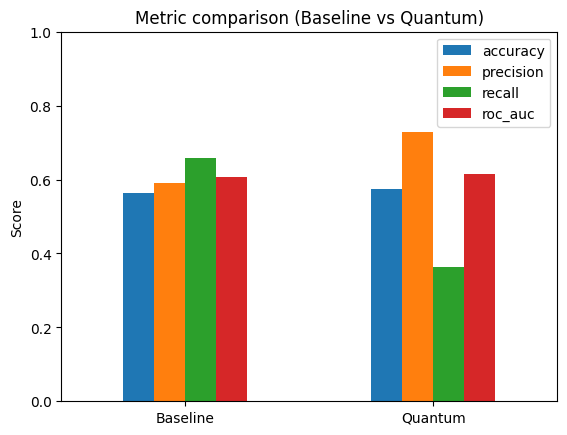

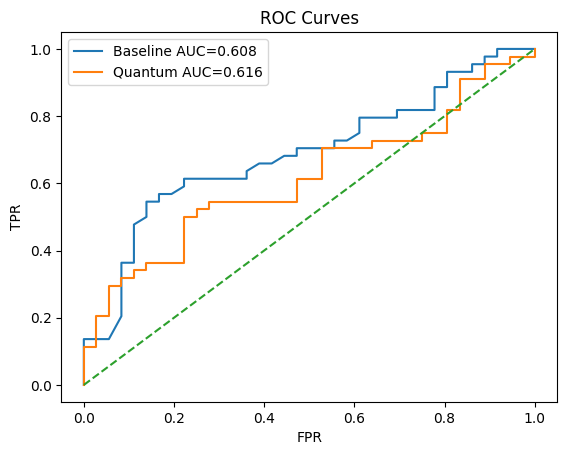

In [15]:
import matplotlib.pyplot as plt

# Summary table
summary = pd.DataFrame([metrics_baseline, metrics_quantum], index=['Baseline', 'Quantum'])
print(summary)

# Bar chart for metrics
summary.plot.bar(rot=0)
plt.title('Metric comparison (Baseline vs Quantum)')
plt.ylabel('Score')
plt.ylim(0,1)
plt.show()

# ROC curves
fpr_b, tpr_b, _ = roc_curve(y_test, y_proba_base)
fpr_q, tpr_q, _ = roc_curve(y_test, q_probs)
plt.plot(fpr_b, tpr_b, label=f'Baseline AUC={metrics_baseline["roc_auc"]:.3f}')
plt.plot(fpr_q, tpr_q, label=f'Quantum AUC={metrics_quantum["roc_auc"]:.3f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.legend(); plt.title('ROC Curves')
plt.show()
